## Visualization

By Sofia Brisson

In this step we are visualizing the results of the inversion for the synthetic model and case study. Includes

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import os
from gempy.bayesian.fields import compute_prob, calculate_ie_masked
from skimage.transform import resize
import pyvista as pv
import matplotlib.pyplot as plt
import  matplotlib
from mpl_toolkits.axes_grid1 import ImageGrid
import gempy as gp

### Methods figures

In [15]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"

geo_data = gp.create_data('fault', extent=[0, 1000, 0, 1000, 0, 1000], resolution=[80,80,80],
                          path_o=path_to_data + "model5_orientations.csv",
                          path_i=path_to_data + "model5_surface_points.csv")
gp.map_stack_to_surfaces(geo_data, {"Fault_Series": 'fault',
                                    "Strat_Series": ('rock2', 'rock1')})
geo_data.set_is_fault(['Fault_Series'])

geo_data.surfaces.colors.change_colors({'rock1': '#a1d99b',
                                        'rock2' : '#3182bd',
                                        'basement' : '#d9d9d9'})
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_data)

Active grids: ['regular']
Fault colors changed. If you do not like this behavior, set change_color to False.
Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                        values
range             1732.050808
$C_o$            71428.571429
drift equations     [3, 3, 3]


C:\ProgramData\Anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


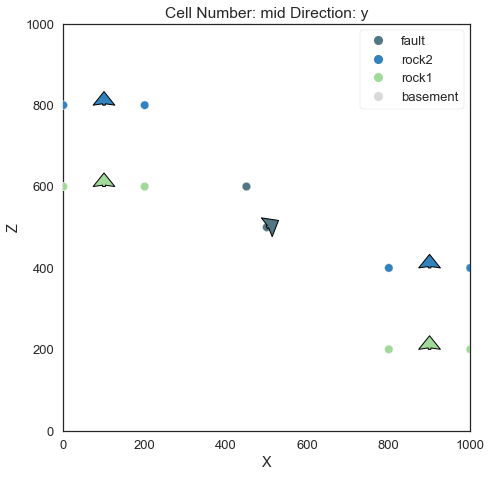

In [24]:
gp.plot_2d(geo_data, direction='y', show_results = False)
plt.savefig('data.svg')

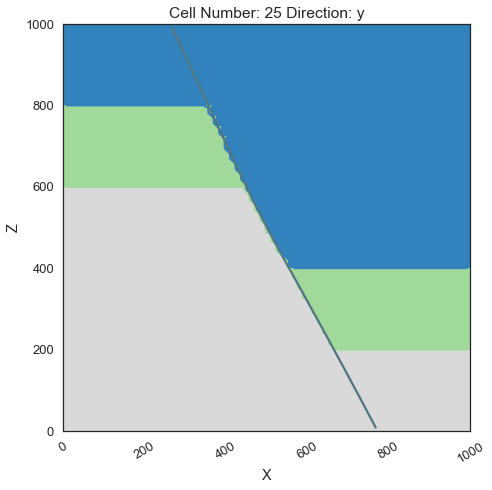

In [25]:
gp.plot_2d(geo_data, cell_number=25,
           direction='y', show_data=False, show_all_data=True)
plt.savefig('model.svg')

C:\ProgramData\Anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


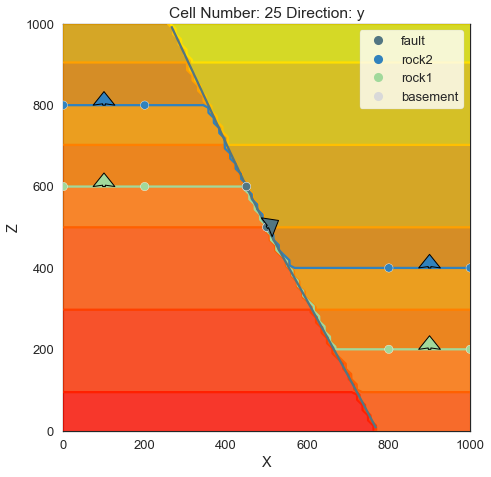

In [26]:
gp.plot_2d(geo_data, cell_number=25,
           direction='y', show_data=True, show_scalar=True, series_n=1)
plt.savefig('scalar.svg')

#### Defining important variables

In [2]:
# set standard derivation as same for all
point_std = 70

# surface points, vertical position
rock1_left_dist = norm(600, point_std)
rock1_right_dist = norm(200, point_std)
rock2_left_dist = norm(800, point_std)
rock2_right_dist = norm(400, point_std)

# fault points, lateral/ x-position:
fault_top_dist = norm(350, point_std)
fault_bottom_dist = norm(750, point_std)

In [28]:
# load posteriors dataframe
posteriors_df = pd.read_csv('accepted_500_hd.csv')

### Parameter correlation visualization

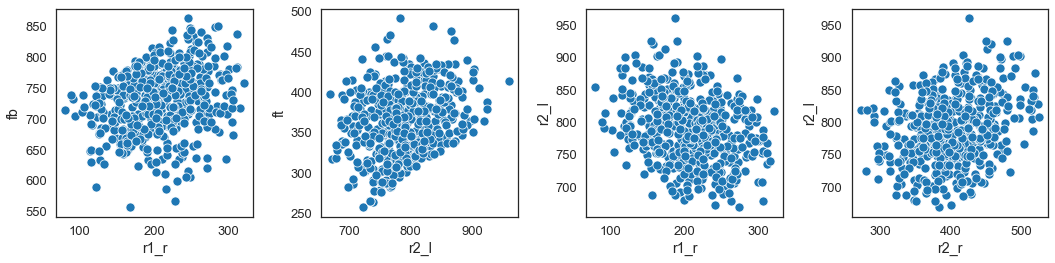

In [75]:
fig, ax = plt.subplots(1,4, figsize = (15,4))
sns.scatterplot(posteriors_df['r1_r'], posteriors_df['fb'], ax = ax[0])
sns.scatterplot(posteriors_df['r2_l'], posteriors_df['ft'], ax = ax[1])
sns.scatterplot(posteriors_df['r1_r'], posteriors_df['r2_l'], ax = ax[2])
sns.scatterplot(posteriors_df['r2_r'], posteriors_df['r2_l'], ax = ax[3])
fig.tight_layout()

In [29]:
r1_r_norm = np.random.normal(200,70,10000)
r2_r_norm = np.random.normal(400,70,10000)
r2_l_norm = np.random.normal(800,70,10000)
ft_norm = np.random.normal(350,70,10000)
fb_norm = np.random.normal(750,70,10000)

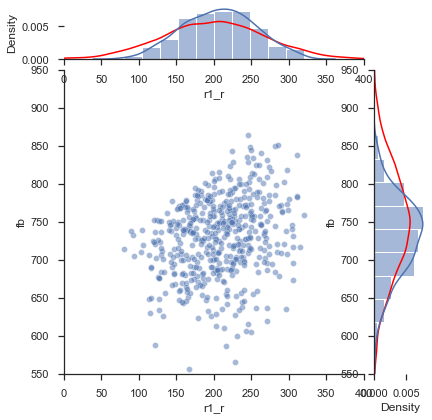

In [34]:
sns.set_theme(style = 'ticks')
df1 = posteriors_df.loc[:,['r1_r','fb']]

axs = sns.jointplot('r1_r', 'fb', data = posteriors_df, kind = 'kde', height=6,ratio=5)
axs.ax_joint.scatter('r1_r', 'fb', data = df1, alpha = 0.5)

axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
axs.ax_joint.cla()
#
axs.ax_marg_x.set_xlim(0,400)
#axs.ax_marg_x.set(xticklabels = [])
#axs.ax_marg_x.tick_params(bottom = False)
axs.ax_marg_y.set_ylim(550,950)
#axs.ax_marg_y.set(yticklabels = [])
#axs.ax_marg_y.tick_params(left= False)

sns.scatterplot(posteriors_df['r1_r'], posteriors_df['fb'], ax=axs.ax_joint, alpha = 0.5)
#x axis
sns.histplot(posteriors_df['r1_r'], ax=axs.ax_marg_x, stat='density', bins=10, alpha = 0.5) 
sns.kdeplot(r1_r_norm, ax=axs.ax_marg_x,color = 'red', alpha = 0.5)
sns.kdeplot(posteriors_df['r1_r'], ax=axs.ax_marg_x)
#y axis
sns.histplot(y = posteriors_df['fb'], ax = axs.ax_marg_y, stat = 'density', bins = 10, alpha = 0.5)
sns.kdeplot(fb_norm, ax = axs.ax_marg_y, color = 'red', vertical = True, alpha = 0.5)
sns.kdeplot(posteriors_df['fb'], ax= axs.ax_marg_y, vertical = True)

plt.savefig('corr1.svg')

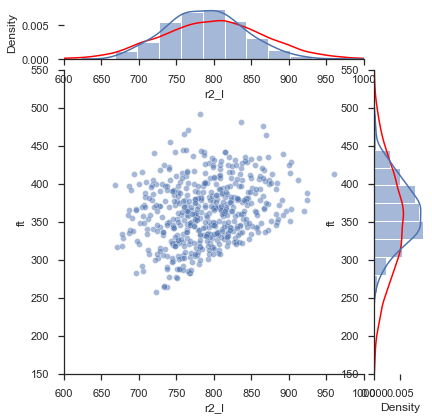

In [35]:
sns.set_theme(style = 'ticks')
df2= posteriors_df.loc[:,['r2_l', 'ft']]

axs = sns.jointplot('r2_l', 'ft', data = posteriors_df, kind = 'kde', height=6,ratio=5)
axs.ax_joint.scatter('r2_l', 'ft', data = df2, alpha = 0.5)

axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
axs.ax_joint.cla()

axs.ax_marg_x.set_xlim(600,1000)
#axs.ax_marg_x.set(xticklabels = [])
#axs.ax_marg_x.tick_params(bottom = False)
axs.ax_marg_y.set_ylim(150,550)
#axs.ax_marg_y.set(yticklabels = [])
#axs.ax_marg_y.tick_params(left= False)

sns.scatterplot(posteriors_df['r2_l'], posteriors_df['ft'], ax=axs.ax_joint, alpha = 0.5)
#x axis
sns.histplot(posteriors_df['r2_l'], ax=axs.ax_marg_x, stat='density', bins=10, alpha = 0.5)
sns.kdeplot(r2_l_norm, ax=axs.ax_marg_x,color = 'red', alpha = 0.5)
sns.kdeplot(posteriors_df['r2_l'], ax=axs.ax_marg_x)
#y axis
sns.histplot(y = posteriors_df['ft'], ax = axs.ax_marg_y, stat = 'density', bins = 10, alpha = 0.5)
sns.kdeplot(ft_norm, ax = axs.ax_marg_y, color = 'red', vertical = True, alpha = 0.5)
sns.kdeplot(posteriors_df['ft'], ax= axs.ax_marg_y, vertical = True)

plt.savefig('corr2.svg')

<AxesSubplot:xlabel='Density', ylabel='r2_l'>

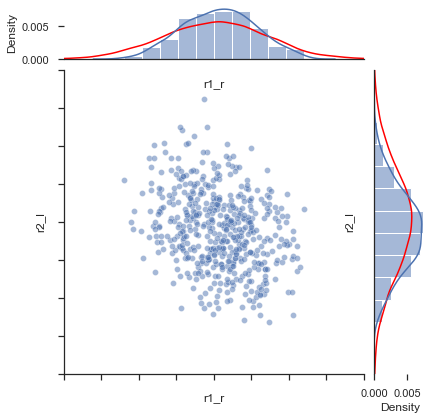

In [16]:
sns.set_theme(style = 'ticks')
df3= posteriors_df.loc[:,['r1_r', 'r2_l']]

axs = sns.jointplot('r1_r', 'r2_l', data = posteriors_df, kind = 'kde', height=6,ratio=5)
axs.ax_joint.scatter('r1_r', 'r2_l', data = df3, alpha = 0.5)

axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
axs.ax_joint.cla()

axs.ax_marg_x.set_xlim(0,400)
axs.ax_marg_x.set(xticklabels = [])
axs.ax_marg_x.tick_params(bottom = False)
axs.ax_marg_y.set_ylim(600,1000)
axs.ax_marg_y.set(yticklabels = [])
axs.ax_marg_y.tick_params(left= False)

sns.scatterplot(posteriors_df['r1_r'], posteriors_df['r2_l'], ax=axs.ax_joint, alpha = 0.5)
#x axis
sns.histplot(posteriors_df['r1_r'], ax=axs.ax_marg_x, stat='density', bins=10, alpha = 0.5)
sns.kdeplot(r1_r_norm, ax=axs.ax_marg_x,color = 'red', alpha = 0.5)
sns.kdeplot(posteriors_df['r1_r'], ax=axs.ax_marg_x)
#y axis
sns.histplot(y = posteriors_df['r2_l'], ax = axs.ax_marg_y, stat = 'density', bins = 10, alpha = 0.5)
sns.kdeplot(r2_l_norm, ax = axs.ax_marg_y, color = 'red', vertical = True, alpha = 0.5)
sns.kdeplot(posteriors_df['r2_l'], ax= axs.ax_marg_y, vertical = True)

<AxesSubplot:xlabel='Density', ylabel='r2_l'>

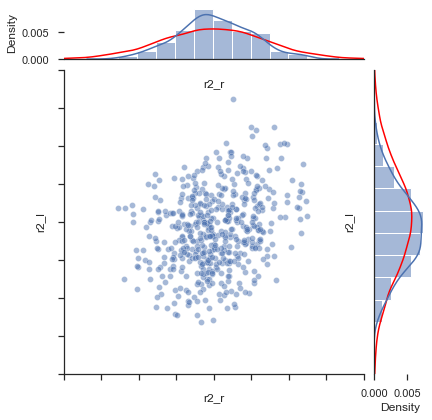

In [19]:
sns.set_theme(style = 'ticks')
df4= posteriors_df.loc[:,['r2_r', 'r2_l']]

axs = sns.jointplot('r2_r', 'r2_l', data = posteriors_df, kind = 'kde', height=6,ratio=5)
axs.ax_joint.scatter('r2_r', 'r2_l', data = df4, alpha = 0.5)

axs.ax_marg_x.cla()
axs.ax_marg_y.cla()
axs.ax_joint.cla()

axs.ax_marg_x.set_xlim(200,600)
axs.ax_marg_x.set(xticklabels = [])
axs.ax_marg_x.tick_params(bottom = False)
axs.ax_marg_y.set_ylim(600,1000)
axs.ax_marg_y.set(yticklabels = [])
axs.ax_marg_y.tick_params(left= False)

sns.scatterplot(posteriors_df['r2_r'], posteriors_df['r2_l'], ax=axs.ax_joint, alpha = 0.5)
#x axis
sns.histplot(posteriors_df['r2_r'], ax=axs.ax_marg_x, stat='density', bins=10, alpha = 0.5)
sns.kdeplot(r2_r_norm, ax=axs.ax_marg_x,color = 'red', alpha = 0.5)
sns.kdeplot(posteriors_df['r2_r'], ax=axs.ax_marg_x)
#y axis
sns.histplot(y = posteriors_df['r2_l'], ax = axs.ax_marg_y, stat = 'density', bins = 10, alpha = 0.5)
sns.kdeplot(r2_l_norm, ax = axs.ax_marg_y, color = 'red', vertical = True, alpha = 0.5)
sns.kdeplot(posteriors_df['r2_l'], ax= axs.ax_marg_y, vertical = True)

### Uncertainty figures

#### Prior entropy (lith blocks)

In [2]:
n_iterations = 500

In [3]:
lith_blocks_list_pr = os.listdir('lith_blocks_pr')

#join all lith_blocks into a single array
lith_blocks_pr = np.array([])
for block in lith_blocks_list_pr:
    lith_blocks_pr = np.append(lith_blocks_pr, np.load('lith_blocks_pr\\' + block))

In [4]:
lith_blocks_orient_pr = lith_blocks_pr.reshape(n_iterations, -1)
prob_block_pr = compute_prob(lith_blocks_orient_pr)
entropy_block_pr = calculate_ie_masked(prob_block_pr)

C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")
C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:23: UserWarning: This function is Deprecated, please use the information_entropy function instead
  warnings.warn("This function is Deprecated, please use the information_entropy function instead")


In [5]:
np.save(r'entropy_blocks/entropy_block_pr', entropy_block_pr)

In [5]:
print(entropy_block_pr.reshape(80,80,80).max()) #of the whole model
print(entropy_block_pr.reshape(80,80,80).min()) #of the whole model
print(entropy_block_pr.reshape(80,80,80).mean()) #of the whole model

1.5654872786429779
0.0
0.42495960512817466


In [6]:
entropy_whole_pr = entropy_block_pr.reshape(80,80,80)
entropy_whole_pr[entropy_whole_pr == 0] = ['nan']
print(np.nanmean(entropy_whole_pr)) #of the whole model

0.5237271878415031


#### Prior entropy (fault blocks)

In [7]:
fault_blocks_list_pr = os.listdir('fault_blocks_pr')

#join all lith_blocks into a single array
fault_blocks_pr = np.array([])
for fault in fault_blocks_list_pr:
    fault_blocks_pr = np.append(fault_blocks_pr, np.load('fault_blocks_pr\\' + fault)[0, 0:512000])

In [10]:
fault_blocks_orient_pr = fault_blocks_pr.reshape(n_iterations, -1)
prob_fblock_pr = compute_prob(fault_blocks_orient_pr)
entropy_fblock_pr = calculate_ie_masked(prob_fblock_pr)

C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")
C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:23: UserWarning: This function is Deprecated, please use the information_entropy function instead
  warnings.warn("This function is Deprecated, please use the information_entropy function instead")


In [11]:
np.save(r'entropy_blocks/entropy_fblock_pr', entropy_fblock_pr)

In [6]:
print(entropy_fblock_pr.reshape(80,80,80).max()) #of the whole model
print(entropy_fblock_pr.reshape(80,80,80).min()) #of the whole model
print(entropy_fblock_pr.reshape(80,80,80).mean()) #of the whole model

1.0
0.0
0.15674068411599587


In [8]:
#mean without 0s
entropy_fwhole_pr = entropy_fblock_pr.reshape(80,80,80)
entropy_fwhole_pr[entropy_fwhole_pr == 0] = ['nan']
print(np.nanmean(entropy_fwhole_pr)) #of the whole model

0.4148636800423381


#### Posterior entropy -lith blocks

In [12]:
lith_blocks_list = os.listdir('lith_blocks')

#join all lith_blocks into a single array
lith_blocks = np.array([])
for block in lith_blocks_list:
    lith_blocks = np.append(lith_blocks, np.load('lith_blocks\\' + block))

In [13]:
lith_blocks_orient = lith_blocks.reshape(n_iterations, -1)
prob_block = compute_prob(lith_blocks_orient)
entropy_block = calculate_ie_masked(prob_block)

In [14]:
np.save(r'entropy_blocks/entropy_block', entropy_block)

#### Statistics

In [25]:
print(entropy_block.reshape(80,80,80).max()) #of the whole model
print(entropy_block.reshape(80,80,80).min()) #of the whole model
print(entropy_block.reshape(80,80,80).mean()) #of the whole model

1.582298321781936
0.0
0.2517913025952746


In [26]:
#mean without 0s
entropy_whole = entropy_block.reshape(80,80,80)
entropy_whole[entropy_whole == 0] = ['nan']
print(np.nanmean(entropy_whole)) #of the whole model

0.5603363610745404


#### Posterior entropy (fault blocks)

In [3]:
fault_blocks_list = os.listdir('fault_blocks')

#join all lith_blocks into a single array
fault_blocks = np.array([])
for fault in fault_blocks_list:
    fault_blocks = np.append(fault_blocks, np.load('fault_blocks\\' + fault)[0, 0:512000])

In [4]:
fault_blocks_orient = fault_blocks.reshape(n_iterations, -1)
prob_fblock = compute_prob(fault_blocks_orient)
entropy_fblock = calculate_ie_masked(prob_fblock)

C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")
C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:23: UserWarning: This function is Deprecated, please use the information_entropy function instead
  warnings.warn("This function is Deprecated, please use the information_entropy function instead")


In [5]:
np.save(r'entropy_blocks/entropy_fblock', entropy_fblock)

In [11]:
print(entropy_fblock.reshape(80,80,80).max()) #of the whole model
print(entropy_fblock.reshape(80,80,80).min()) #of the whole model
print(entropy_fblock.reshape(80,80,80).mean()) #of the whole model

1.0
0.0
0.10559741790834529


In [12]:
#mean without 0s
entropy_fwhole = entropy_fblock.reshape(80,80,80)
entropy_fwhole[entropy_fwhole == 0] = ['nan']
print(np.nanmean(entropy_fwhole)) #of the whole model

0.4575649794268178


#### Plotting the uncertainty

#### 2D

In [39]:
entropy_block_pr = np.load('entropy_blocks/entropy_block_pr.npy')
entropy_fblock_pr = np.load('entropy_blocks/entropy_fblock_pr.npy')
entropy_block_ps = np.load('entropy_blocks/entropy_block.npy')
entropy_fblock_ps = np.load('entropy_blocks/entropy_fblock.npy')

In [40]:
entropy_diff_lith = entropy_block_pr -entropy_block
entropy_diff_fault = entropy_fblock_pr - entropy_fblock 

ValueError: operands could not be broadcast together with shapes (512000,) (320000,) 

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

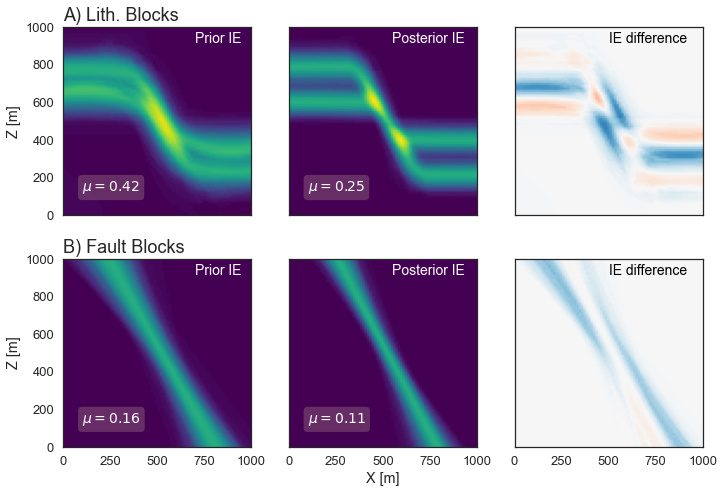

In [125]:
cell = 40
fig, ax= plt.subplots(2,3, sharey = True, sharex = True)


im1 = ax[0,0].imshow(entropy_block_pr.reshape(80,80,80)[:,cell,:].T, cmap = 'viridis', origin = 'lower',
              extent = [0,1000,0,1000], vmax=1.6)
im2 = ax[0,1].imshow(entropy_block.reshape(80,80,80)[:,cell,:].T, cmap = 'viridis', origin = 'lower',
              extent = [0,1000,0,1000], vmax=1.6)
im3 = ax[0,2].imshow(entropy_diff_lith.reshape(80,80,80)[:,cell,:].T, cmap = 'RdBu', origin = 'lower',
              extent = [0,1000,0,1000], clim = [-1.15,1.15])
im4 = ax[1,0].imshow(entropy_fblock_pr.reshape(80,80,80)[:,cell,:].T, cmap = 'viridis', origin = 'lower',
              extent = [0,1000,0,1000], vmax=1.6)
im5 = ax[1,1].imshow(entropy_fblock.reshape(80,80,80)[:,cell,:].T, cmap = 'viridis', origin = 'lower',
              extent = [0,1000,0,1000], vmax=1.6)
im6 = ax[1,2].imshow(entropy_diff_fault.reshape(80,80,80)[:,cell,:].T, cmap = 'RdBu', origin = 'lower',
              extent = [0,1000,0,1000], clim = [-1.15, 1.15])

#Axes labels
ax[0,0].set_ylabel('Z [m]')
ax[1,0].set_ylabel('Z [m]')
ax[1,1].set_xlabel('X [m]')

ax[0,0].set_title('A) Lith. Blocks', loc = 'left', fontsize = 18)
ax[1,0].set_title('B) Fault Blocks', loc = 'left', fontsize = 18)

#Textboxes
ax[0,0].text(0.7,0.9, 'Prior IE', fontsize = 14, verticalalignment = 'bottom', color = 'white',transform = ax[0,0].transAxes)
ax[0,1].text(0.55,0.9, 'Posterior IE', fontsize = 14, verticalalignment = 'bottom', color = 'white',transform = ax[0,1].transAxes)
ax[0,2].text(0.5,0.9, 'IE difference', fontsize = 14, verticalalignment = 'bottom', color = 'black',transform = ax[0,2].transAxes)

ax[1,0].text(0.7,0.9, 'Prior IE', fontsize = 14, verticalalignment = 'bottom', color = 'white',transform = ax[1,0].transAxes)
ax[1,1].text(0.55,0.9, 'Posterior IE', fontsize = 14, verticalalignment = 'bottom', color = 'white',transform = ax[1,1].transAxes)
ax[1,2].text(0.5,0.9, 'IE difference', fontsize = 14, verticalalignment = 'bottom', color = 'black',transform = ax[1,2].transAxes)


props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)
ax[0,0].text(0.1,0.1, '$\mu=0.42$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0,0].transAxes, bbox = props)
ax[0,1].text(0.1,0.1, '$\mu=0.25$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0,1].transAxes, bbox = props)
ax[1,0].text(0.1,0.1, '$\mu=0.16$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1,0].transAxes, bbox = props)
ax[1,1].text(0.1,0.1, '$\mu=0.11$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1,1].transAxes, bbox = props)

#colorbar

fig.tight_layout()

plt.savefig('entropy_comparison.svg')

In [107]:
# Plot colorbars separately cause I'm stupid

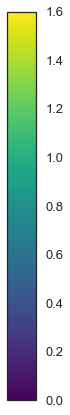

In [126]:
import pylab as pl

a = np.array([[0,1.6]])
pl.figure(figsize=(0.5,9))
img = pl.imshow(a, cmap="viridis")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="vertical", cax=cax)
pl.savefig("colorbar1.png")

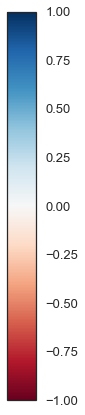

In [127]:
a = np.array([[-1,1]])
pl.figure(figsize=(0.5,9))
img = pl.imshow(a, cmap="RdBu")
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="vertical", cax=cax)
pl.savefig("colorbar2.png")

#### 3D

In [32]:
entropy_block = entropy_block.reshape(80,80,80)
entropy_block_mapped = resize(entropy_block.reshape(80,80,80),(80,80,80))

In [46]:
def plot_entropy_3d(array):
    sargs = dict(
        n_labels= 4,
        fmt="%.2f",
        color='black'
    )
        
    p = pv.Plotter(notebook = False)
    p.camera_position =[(225.42616094676856, 399.12340631668496, 257.3912472495674), 
                        (-74.48617945870785, 148.24735445450216, -18.0350197347693), 
                        (-0.4070592293592159, -0.409653310787582, 0.8163865192139408)]
    x = np.arange(0, array.shape[1], 1)
    y = np.arange(0, array.shape[0], 1)
    z = np.arange(0, array.shape[2], 1)
    x, y, z = np.meshgrid(-x, y, z)


    grid = pv.StructuredGrid(x, y, z)
    grid["Entropy"] = array.ravel(order="F")
    p.add_mesh(grid, scalars=grid["Entropy"], cmap='viridis', show_scalar_bar = True, scalar_bar_args=sargs, clim=[0,2.1], stitle='Information Entropy')
 #   p.add_text(formations[i], position='upper_edge', font_size=12, color='black', shadow = True)

    p.set_background('white')
    p.show_grid(color='black')
    p.show()

In [36]:
plot_entropy_3d(entropy_block_mapped)

C:\ProgramData\Anaconda3\lib\site-packages\pyvista\plotting\plotting.py:1354: PyvistaDeprecationWarning: 
"stitle" is a depreciated keyword and will be removed in a future
release.

Use ``scalar_bar_args`` instead.  For example:

scalar_bar_args={'title': 'Scalar Bar Title'}

  warnings.warn(USE_SCALAR_BAR_ARGS, PyvistaDeprecationWarning)


# Entropy plots case study

### Prior entropy

#### Lith blocks

In [2]:
lith_blocks_list = os.listdir(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\lith_blocks\100')

#join all lith_blocks into a single array
lith_blocks = np.array([])
for block in lith_blocks_list:
    lith_blocks = np.append(lith_blocks, np.load(r'C:\\Users\\Sofia\\Documents\\Sofia\\gempy_models\\final_models\\lith_blocks\\100\\' + block))

In [3]:
n_iterations = 100

In [4]:
lith_blocks_orient = lith_blocks.reshape(n_iterations, -1)
prob_block = compute_prob(lith_blocks_orient)
entropy_block = calculate_ie_masked(prob_block)

C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:8: UserWarning: This function is Deprecated, please use the probability function instead
  warnings.warn("This function is Deprecated, please use the probability function instead")
C:\ProgramData\Anaconda3\lib\site-packages\gempy\bayesian\fields.py:23: UserWarning: This function is Deprecated, please use the information_entropy function instead
  warnings.warn("This function is Deprecated, please use the information_entropy function instead")


In [6]:
np.save(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_block_pr.npy', entropy_block)

In [8]:
print(entropy_block.reshape(80,80,50).max()) #of the whole model
print(entropy_block.reshape(80,80,50).min()) #of the whole model
print(entropy_block.reshape(80,80,50).mean()) #of the whole model

2.318678980992639
0.0
0.3390573933210732


In [10]:
#mean without 0s
entropy_whole = entropy_block.reshape(80,80,50)
entropy_whole[entropy_whole == 0] = ['nan']
print(np.nanmean(entropy_whole)) #of the whole model

0.698776741414857


#### fault_blocks

In [7]:
fault_blocks_list = os.listdir(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\fault_blocks\100')

#join all lith_blocks into a single array
fault_blocks = np.array([])
for fault in fault_blocks_list:
    fault_blocks = np.append(fault_blocks, np.load(r'C:\\Users\\Sofia\\Documents\\Sofia\\gempy_models\\final_models\\fault_blocks\\100\\' + fault)[0, 0:320000])

In [8]:
fault_blocks_orient = fault_blocks.reshape(n_iterations, -1)
prob_fblock = compute_prob(fault_blocks_orient)
entropy_fblock = calculate_ie_masked(prob_fblock)

In [9]:
np.save(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_fblock_pr.npy', entropy_fblock)

In [14]:
print(entropy_fblock.reshape(80,80,50).max()) #of the whole model
print(entropy_fblock.reshape(80,80,50).min()) #of the whole model
print(entropy_fblock.reshape(80,80,50).mean()) #of the whole model

2.120717181863926
0.0
0.13770868232630112


In [16]:
#mean without 0s
entropy_fwhole = entropy_fblock.reshape(80,80,50)
entropy_fwhole[entropy_fwhole == 0] = ['nan']
print(np.nanmean(entropy_fwhole)) #of the whole model

0.7425274798122291


### Prior 2d Plots

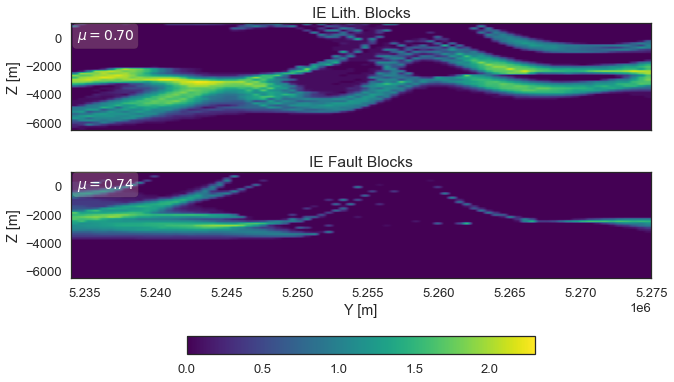

In [22]:
cell = 20
fig, ax= plt.subplots(2,1,sharex = True)

im1 = ax[0].imshow(entropy_block_pr.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)
im2 = ax[1].imshow(entropy_fblock_pr.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('IE Lith. Blocks')
ax[1].set_title('IE Fault Blocks')
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)

ax[0].text(0.01,0.8, '$\mu=0.70$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0].transAxes, bbox = props)
ax[1].text(0.01,0.8, '$\mu=0.74$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1].transAxes, bbox = props)

fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')

### Prior 3d plots

In [47]:
entropy_fblock_pr = entropy_fblock_pr.reshape(80,80,50)
entropy_fblock_mapped_pr = resize(entropy_fblock_pr.reshape(80,80,50),(80,160,25))

In [ ]:
plot_entropy_3d(entropy_fblock_mapped_pr)

### Posterior entropy

#### Lith blocks

In [11]:
lith_blocks_list_ps = os.listdir(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\lith_blocks_topo')

#join all lith_blocks into a single array
lith_blocks_ps = np.array([])
for block in lith_blocks_list_ps:
    lith_blocks_ps = np.append(lith_blocks_ps, np.load(r'C:\\Users\\Sofia\\Documents\\Sofia\\gempy_models\\final_models\\lith_blocks_topo\\' + block))

In [12]:
n_iterations = 100

In [13]:
lith_blocks_orient_ps = lith_blocks_ps.reshape(n_iterations, -1)
prob_block_ps = compute_prob(lith_blocks_orient_ps)
entropy_block_ps = calculate_ie_masked(prob_block_ps)

In [14]:
np.save(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_block_ps.npy', entropy_block_ps)

In [6]:
print(entropy_block_ps.reshape(80,80,50).max()) #of the whole model
print(entropy_block_ps.reshape(80,80,50).min()) #of the whole model
print(entropy_block_ps.reshape(80,80,50).mean()) #of the whole model

2.2924958900123715
0.0
0.2838958912657263


In [7]:
#mean without 0s
entropy_whole_ps = entropy_block_ps.reshape(80,80,50)
entropy_whole_ps[entropy_whole_ps == 0] = ['nan']
print(np.nanmean(entropy_whole_ps)) #of the whole model

0.7285745178483805


#### Fault blocks

In [15]:
fault_blocks_list_ps = os.listdir(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\fault_blocks_topo')

#join all lith_blocks into a single array
fault_blocks_ps = np.array([])
for fault in fault_blocks_list_ps:
    fault_blocks_ps = np.append(fault_blocks_ps, np.load(r'C:\\Users\\Sofia\\Documents\\Sofia\\gempy_models\\final_models\\fault_blocks_topo\\' + fault)[0, 0:320000])

In [16]:
fault_blocks_orient_ps = fault_blocks_ps.reshape(n_iterations, -1)
prob_fblock_ps = compute_prob(fault_blocks_orient_ps)
entropy_fblock_ps = calculate_ie_masked(prob_fblock_ps)

In [17]:
np.save(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_fblock_ps.npy', entropy_fblock_ps)

In [11]:
print(entropy_fblock_ps.reshape(80,80,50).max()) #of the whole model
print(entropy_fblock_ps.reshape(80,80,50).min()) #of the whole model
print(entropy_fblock_ps.reshape(80,80,50).mean()) #of the whole model

2.05333118961139
0.0
0.12755230743792062


In [12]:
#mean without 0s
entropy_fwhole_ps = entropy_fblock_ps.reshape(80,80,50)
entropy_fwhole_ps[entropy_fwhole_ps == 0] = ['nan']
print(np.nanmean(entropy_fwhole_ps)) #of the whole model

0.7635290953671031


#### 2d Plots

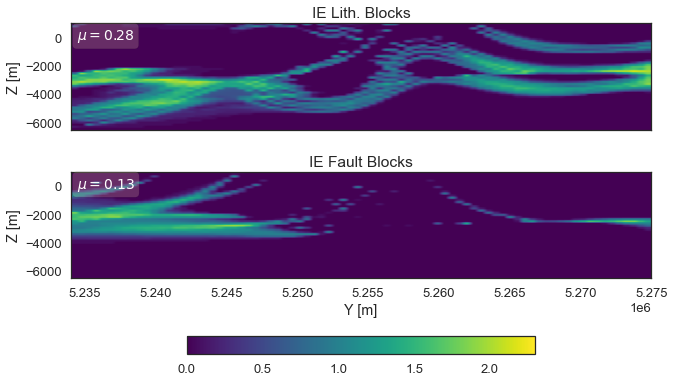

In [21]:
cell = 20
fig, ax= plt.subplots(2,1,sharex = True)

im1 = ax[0].imshow(entropy_block_ps.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)
im2 = ax[1].imshow(entropy_fblock_ps.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('IE Lith. Blocks')
ax[1].set_title('IE Fault Blocks')
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)

ax[0].text(0.01,0.8, '$\mu=0.28$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0].transAxes, bbox = props)
ax[1].text(0.01,0.8, '$\mu=0.13$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1].transAxes, bbox = props)

fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')

#### Comparison plot

In [11]:
entropy_block = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_block.npy')

#### Lith blocks

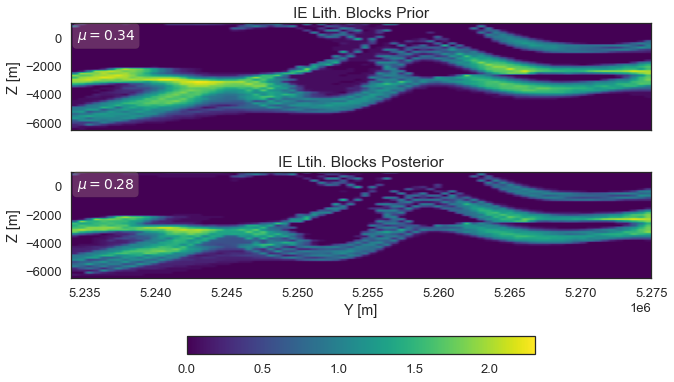

In [20]:
cell = 20
fig, ax= plt.subplots(2,1,sharex = True)

im1 = ax[0].imshow(entropy_block_pr.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)
im2 = ax[1].imshow(entropy_block_ps.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.3)

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('IE Lith. Blocks Prior')
ax[1].set_title('IE Ltih. Blocks Posterior')
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)

ax[0].text(0.01,0.8, '$\mu=0.34$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0].transAxes, bbox = props)
ax[1].text(0.01,0.8, '$\mu=0.28$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1].transAxes, bbox = props)

fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')

In [19]:
entropy_fblock = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_fblock.npy')

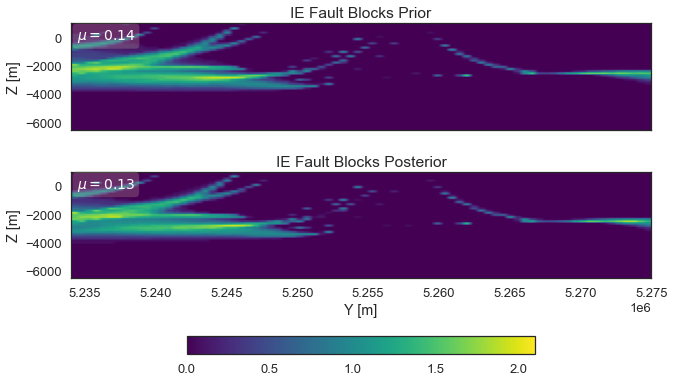

In [19]:
cell = 20
fig, ax= plt.subplots(2,1,sharex = True)

im1 = ax[0].imshow(entropy_fblock_pr.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.1)
im2 = ax[1].imshow(entropy_fblock_ps.reshape(80,80,50)[cell,:,:].T, cmap = 'viridis', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], vmax=2.1)

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('IE Fault Blocks Prior')
ax[1].set_title('IE Fault Blocks Posterior')
props = dict(boxstyle = 'round', facecolor = 'wheat', alpha = 0.2)

ax[0].text(0.01,0.8, '$\mu=0.14$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[0].transAxes, bbox = props)
ax[1].text(0.01,0.8, '$\mu=0.13$',fontsize = 14, verticalalignment = 'bottom', color = 'white',
             transform = ax[1].transAxes, bbox = props)

fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')

### Entropy difference plot

In [43]:
entropy_block_pr = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_block_pr.npy')
entropy_block_ps = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_block_ps.npy')
entropy_fblock_pr = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_fblock_pr.npy')
entropy_fblock_ps = np.load(r'C:\Users\Sofia\Documents\Sofia\gempy_models\final_models\entropy_blocks\entropy_fblock_ps.npy')

In [3]:
entropy_diff_lith_cs = entropy_block_pr - entropy_block_ps
entropy_diff_fault_cs = entropy_fblock_pr - entropy_fblock_ps

In [5]:
entropy_diff_fault_cs.min()

-0.7957648872398648

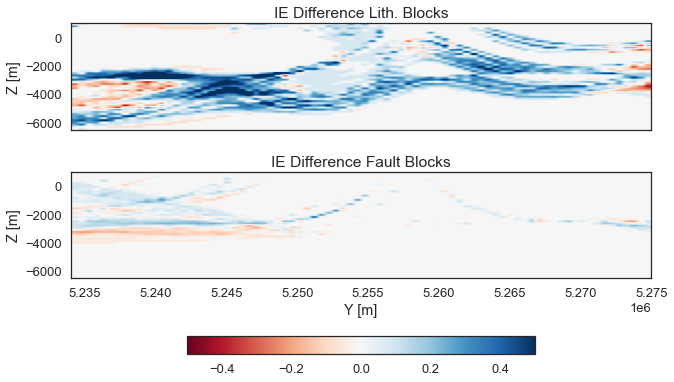

In [17]:
cell = 20
fig, ax= plt.subplots(2,1,sharex = True)

im1 = ax[0].imshow(entropy_diff_lith_cs.reshape(80,80,50)[cell,:,:].T, cmap = 'RdBu', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], clim = [-0.5, 0.5])
im2 = ax[1].imshow(entropy_diff_fault_cs.reshape(80,80,50)[cell,:,:].T, cmap = 'RdBu', origin = 'lower',
              extent = [5234000,5275000,-6500,1000], clim = [-0.8, 0.8])

ax[1].set_xlabel('Y [m]')
ax[0].set_ylabel('Z [m]')
ax[1].set_ylabel('Z [m]')

ax[0].set_title('IE Difference Lith. Blocks')
ax[1].set_title('IE Difference Fault Blocks')

#cbar_ax = fig.add_axes([0.99, 0.15, 0.03, 0.7])
#fig.colorbar(im1, cax=cbar_ax)

fig.colorbar(im1, ax = ax[:], shrink = 0.6, location = 'bottom')